# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.133
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.1844
Generation: 30. 正答率(トレーニング) = 0.33
                : 30. 正答率(テスト) = 0.2345
Generation: 40. 正答率(トレーニング) = 0.39666666666666667
                : 40. 正答率(テスト) = 0.2957
Generation: 50. 正答率(トレーニング) = 0.44666666666666666
                : 50. 正答率(テスト) = 0.3302
Generation: 60. 正答率(トレーニング) = 0.5
                : 60. 正答率(テスト) = 0.3646
Generation: 70. 正答率(トレーニング) = 0.5633333333333334
                : 70. 正答率(テスト) = 0.4034
Generation: 80. 正答率(トレーニング) = 0.6233333333333333
                : 80. 正答率(テスト) = 0.4406
Generation: 90. 正答率(トレーニング) = 0.71
                : 90. 正答率(テスト) = 0.5114
Generation: 100. 正答率(トレーニング) = 0.77
                : 100. 正答率(テスト) = 0.5705
Generation: 110. 正答率(トレーニング) = 0.79
                : 110. 正答率(テスト) = 0.5956
Generation: 120. 正答率(トレーニング) = 0.8
                : 120. 正答率(テスト) = 0.6226
Generation: 13

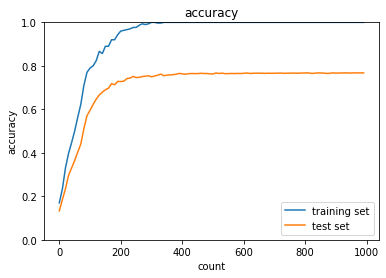

In [12]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08666666666666667
                : 10. 正答率(テスト) = 0.1051
Generation: 20. 正答率(トレーニング) = 0.16333333333333333
                : 20. 正答率(テスト) = 0.1226
Generation: 30. 正答率(トレーニング) = 0.23333333333333334
                : 30. 正答率(テスト) = 0.1579
Generation: 40. 正答率(トレーニング) = 0.31333333333333335
                : 40. 正答率(テスト) = 0.2085
Generation: 50. 正答率(トレーニング) = 0.37
                : 50. 正答率(テスト) = 0.2523
Generation: 60. 正答率(トレーニング) = 0.4066666666666667
                : 60. 正答率(テスト) = 0.2801
Generation: 70. 正答率(トレーニング) = 0.46
                : 70. 正答率(テスト) = 0.3166
Generation: 80. 正答率(トレーニング) = 0.49333333333333335
                : 80. 正答率(テスト) = 0.3499
Generation: 90. 正答率(トレーニング) = 0.5466666666666666
                : 90. 正答率(テスト) = 0.3856
Generation: 100. 正答率(トレーニング) = 0.58
                : 100. 正答率(テスト) = 0.4236
Generation: 110. 正答率(トレーニング) = 0.6233333333333333
                : 110. 正答率(テスト) = 0.4582
Generation: 120. 正答率(トレーニング) = 0.63
        

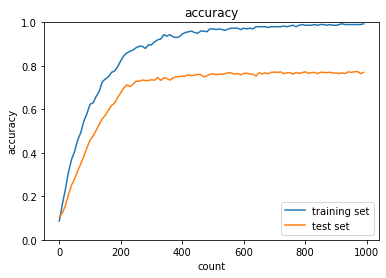

In [13]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.1
weight_decay_lambda = 0.05
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5866666666666667
                : 10. 正答率(テスト) = 0.4361
Generation: 20. 正答率(トレーニング) = 0.43
                : 20. 正答率(テスト) = 0.3312
Generation: 30. 正答率(トレーニング) = 0.5866666666666667
                : 30. 正答率(テスト) = 0.4522
Generation: 40. 正答率(トレーニング) = 0.83
                : 40. 正答率(テスト) = 0.6422
Generation: 50. 正答率(トレーニング) = 0.9466666666666667
                : 50. 正答率(テスト) = 0.7484
Generation: 60. 正答率(トレーニング) = 0.8833333333333333
                : 60. 正答率(テスト) = 0.6805
Generation: 70. 正答率(トレーニング) = 0.9433333333333334
                : 70. 正答率(テスト) = 0.7331
Generation: 80. 正答率(トレーニング) = 0.6533333333333333
                : 80. 正答率(テスト) = 0.5224
Generation: 90. 正答率(トレーニング) = 0.9666666666666667
                : 90. 正答率(テスト) = 0.7781
Generation: 100. 正答率(トレーニング) = 0.9766666666666667
                : 100. 正答率(テスト) = 0.7704
Generation: 110. 正答率(トレーニング) = 0.99
                : 110. 正答率(テスト) = 0.784
Generation: 120. 正答率(トレーニング) = 0.98
              

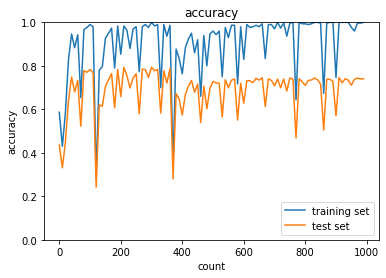

In [14]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.003
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [15]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.47
                : 10. 正答率(テスト) = 0.3756
Generation: 20. 正答率(トレーニング) = 0.7
                : 20. 正答率(テスト) = 0.5249
Generation: 30. 正答率(トレーニング) = 0.8433333333333334
                : 30. 正答率(テスト) = 0.6632
Generation: 40. 正答率(トレーニング) = 0.8866666666666667
                : 40. 正答率(テスト) = 0.7235
Generation: 50. 正答率(トレーニング) = 0.9333333333333333
                : 50. 正答率(テスト) = 0.7562
Generation: 60. 正答率(トレーニング) = 0.9666666666666667
                : 60. 正答率(テスト) = 0.7749
Generation: 70. 正答率(トレーニング) = 0.9833333333333333
                : 70. 正答率(テスト) = 0.7766
Generation: 80. 正答率(トレーニング) = 0.99
                : 80. 正答率(テスト) = 0.7928
Generation: 90. 正答率(トレーニング) = 0.9933333333333333
                : 90. 正答率(テスト) = 0.7885
Generation: 100. 正答率(トレーニング) = 0.9966666666666667
                : 100. 正答率(テスト) = 0.791
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.797
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) 

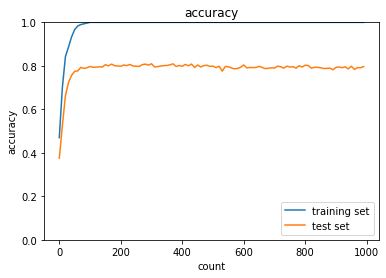

In [26]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1371
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1601
Generation: 30. 正答率(トレーニング) = 0.18333333333333332
                : 30. 正答率(テスト) = 0.1913
Generation: 40. 正答率(トレーニング) = 0.22333333333333333
                : 40. 正答率(テスト) = 0.213
Generation: 50. 正答率(トレーニング) = 0.2833333333333333
                : 50. 正答率(テスト) = 0.2381
Generation: 60. 正答率(トレーニング) = 0.32
                : 60. 正答率(テスト) = 0.2596
Generation: 70. 正答率(トレーニング) = 0.37333333333333335
                : 70. 正答率(テスト) = 0.2811
Generation: 80. 正答率(トレーニング) = 0.4266666666666667
                : 80. 正答率(テスト) = 0.3011
Generation: 90. 正答率(トレーニング) = 0.44666666666666666
                : 90. 正答率(テスト) = 0.3243
Generation: 100. 正答率(トレーニング) = 0.4666666666666667
                : 100. 正答率(テスト) = 0.3453
Generation: 110. 正答率(トレーニング) = 0.49
                : 110. 正答率(テスト) = 0.3647
Generation: 120. 正答率(トレーニング) = 0.503333333333

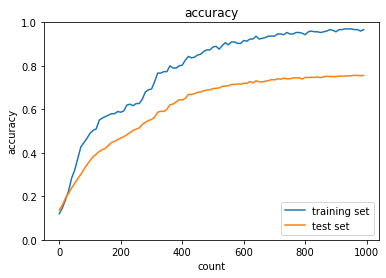

In [33]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.07
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()